# 1. Introduction + Data analysis and visualization

## 1.1 Introduction


The objective of this project is the data analysis and the creation of a model that predicts the demand of bikes for the next 24 hours for a cluster of stations in New-York city, in order to help the company Citi Bike operate at its best and make bike sharing more attractive.
Thus, this project is split into 4 sections:
1) Introduction + Data analysis and visualization
2) Prediction Challenge
3) Exploratory Component
4) Conclusions

## 1.2 Data Analysis

### 1.2.1 File import and general information

First of all, the file has to be uploaded and after that some information of the dataset is displayed, like the first rows and the statistics of the data, so that we have an overall idea of the data and the variables. Then, the preparation of the necessary data can begin.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Trips_2018.csv")

print(data.head())


print("BASIC STATS")
print(data.info())

print(data.describe())

print("DATA SHAPE:")
print(data.shape)

   Unnamed: 0  tripduration                 starttime  \
0           0           970  2018-01-01 13:50:57.4340   
1           1           723  2018-01-01 15:33:30.1820   
2           2           496  2018-01-01 15:39:18.3370   
3           3           306  2018-01-01 15:40:13.3720   
4           4           306  2018-01-01 18:14:51.5680   

                   stoptime  start_station_id  start_station_latitude  \
0  2018-01-01 14:07:08.1860              72.0               40.767272   
1  2018-01-01 15:45:33.3410              72.0               40.767272   
2  2018-01-01 15:47:35.1720              72.0               40.767272   
3  2018-01-01 15:45:20.1910              72.0               40.767272   
4  2018-01-01 18:19:57.6420              72.0               40.767272   

   start_station_longitude  end_station_id  end_station_latitude  \
0               -73.993929           505.0             40.749013   
1               -73.993929          3255.0             40.750585   
2             

### 1.2.2 Data preparation 

To begin with, as can be seen above from the data info, the type of every variable seems to be correct apart from "starttime" and "stoptime", which are object. So, they have to be converted to datetime type.

In [4]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

Then, we have to check for any missing values in the dataset. 

In [5]:
data.isna().sum().sort_values(ascending=False)

start_station_id           2497
end_station_id             2497
Unnamed: 0                    0
tripduration                  0
starttime                     0
stoptime                      0
start_station_latitude        0
start_station_longitude       0
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64

There are only 2497 missing values in "start_station_id" and "end_station_id" variables respectively. So, they have to be removed.

In [6]:
data = data.dropna(subset=['start_station_id','end_station_id'])
data.isna().sum()

Unnamed: 0                 0
tripduration               0
starttime                  0
stoptime                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
birth_year                 0
gender                     0
dtype: int64

The unnecessary column "Unnamed: 0" can also be removed. 

In [7]:
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17545842 entries, 0 to 17548338
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bikeid                   int64         
 10  usertype                 object        
 11  birth_year               int64         
 12  gender                   int64         
dtypes: datetime64[ns](2), float64(6), int64(4), object(1)
memory usage: 1.8+ GB


Last but not least, we are going to remove the rows where the duration is bigger than 3505, which is the 99th percentile, as these values may be mistakes. Another way to deal with this problem would be to replace these values with the respective mean. After the removal, we can see that the mean of the trip duration dropped more than 20% to 776 seconds and that was expected as there were some very big abnormal values before.

In [8]:
np.percentile(data['tripduration'], 99)
data = data[data['tripduration'] <= np.percentile(data['tripduration'], 99)]
data.describe()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.737044e+07,17370439,17370439,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07,1.737044e+07
mean,7.766654e+02,2018-07-16 03:31:04.224899328,2018-07-16 03:44:01.395498240,1.586799e+03,4.073729e+01,-7.398264e+01,1.577606e+03,4.073696e+01,-7.398285e+01,2.657129e+04,1.979021e+03,1.152737e+00
min,6.100000e+01,2018-01-01 00:01:50.650000,2018-01-01 00:05:07.438000,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.407196e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.560000e+02,2018-05-08 18:35:29.310000128,2018-05-08 18:50:08.353999872,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.030800e+04,1.969000e+03,1.000000e+00
50%,5.990000e+02,2018-07-19 16:35:31.456000,2018-07-19 16:49:45.526000128,5.050000e+02,4.073818e+01,-7.398565e+01,5.040000e+02,4.073756e+01,-7.398632e+01,2.828200e+04,1.981000e+03,1.000000e+00
75%,1.040000e+03,2018-09-27 16:52:40.791500032,2018-09-27 17:06:53.505000192,3.244000e+03,4.075757e+01,-7.397283e+01,3.244000e+03,4.075715e+01,-7.397344e+01,3.185700e+04,1.989000e+03,1.000000e+00
max,3.505000e+03,2018-12-31 23:59:51.085000,2019-01-01 00:44:27.517000,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00
std,5.760429e+02,NaN,NaN,1.439114e+03,3.195860e-02,1.908048e-02,1.438169e+03,3.173642e-02,1.914988e-02,6.220132e+03,1.193173e+01,5.394044e-01


## 1.3 Data vizualization

Now we can proceed to the data visualization in order to get a better understanding of the data. Firstly, the daily trip distribution over the year is plotted. As can be seen below, from May to September the number of trips on average is greater than the number of the other months. This is completely normal, considering the better weather conditions these months(temperature, sunshine, etc.). Since weather may be a factor to the increase of daily trips, relevant weather data can be used to formulate a new model later on. Also, since our test set includes data from November and December, we can see that the trip distribution in these months in overall is simiral to the trip distribution of the other months, which means that the error between the training and the test set should be low. 

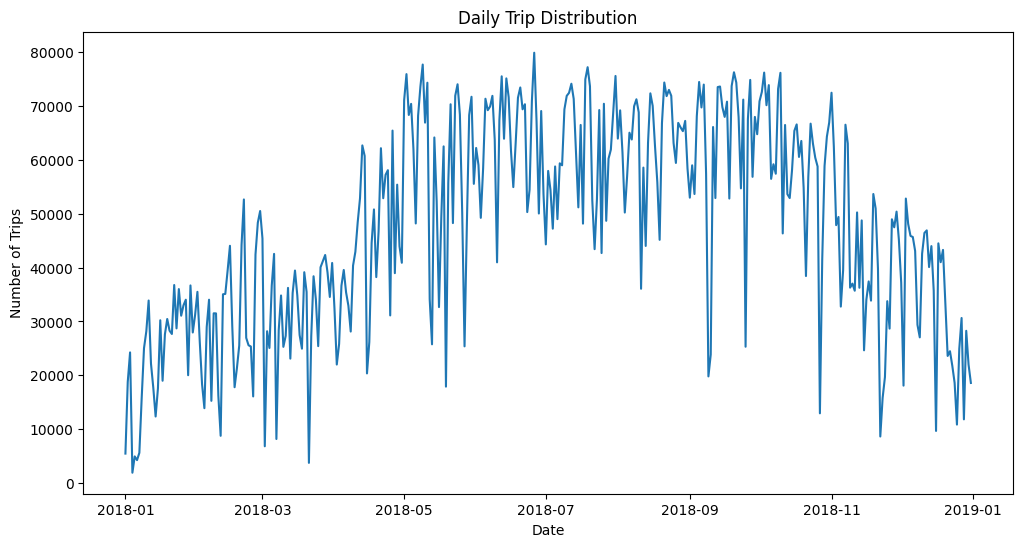

In [9]:
daily_trips = data.groupby(data['starttime'].dt.date).size()
daily_trips.plot(kind='line', figsize=(12, 6))
plt.title('Daily Trip Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

Furthermore, we can plot the trip duration and the stations with the most trips. In the first plot we can see that the distribution of the trip durations is similar to a right-skewed distribution and the mode is under 400 seconds, a normal duration for a single bike trip. In the second plot we can see the 20 (start) stations with the most trips. Except of the one station which has almost double the trips from the others and may be a central one, the distribution of trips on the other stations is pretty normal.

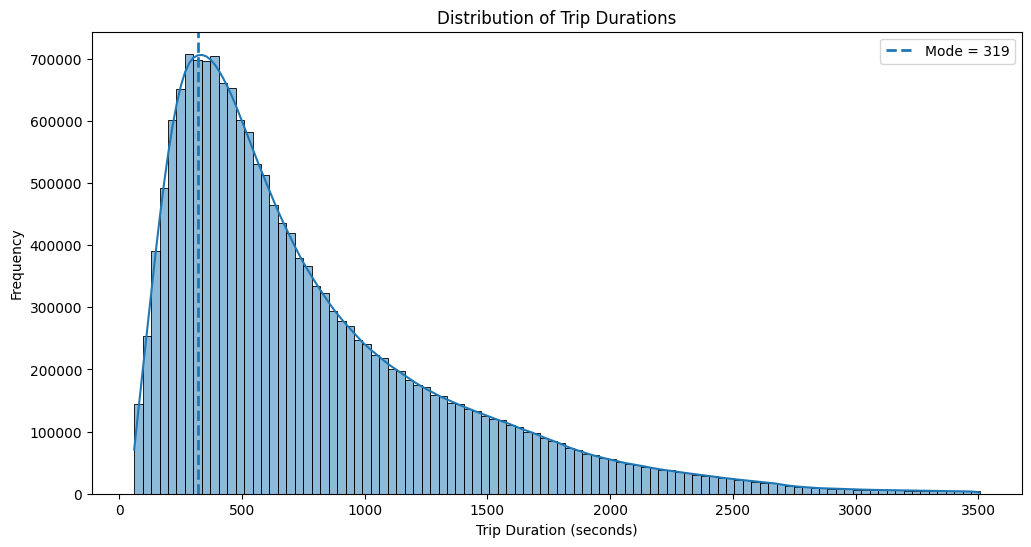

In [10]:
mode_value = data['tripduration'].mode()[0]
plt.figure(figsize=(12, 6))
sns.histplot(data['tripduration'], bins=100, kde=True)
plt.axvline(mode_value, linestyle='--', linewidth=2, label=f'Mode = {mode_value}')
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

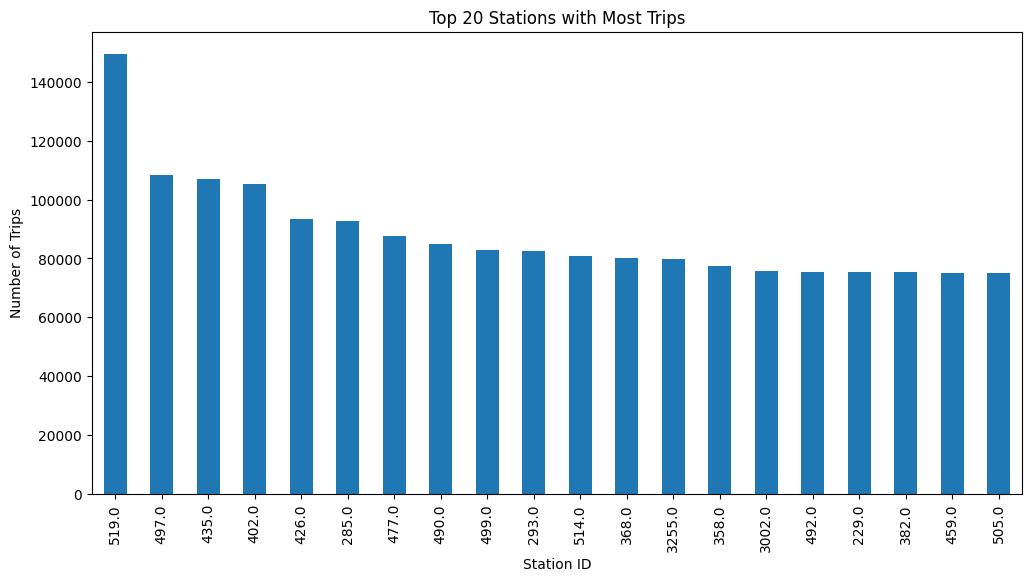

In [11]:
trips_per_station = data['start_station_id'].value_counts()
trips_per_station.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Stations with Most Trips')
plt.xlabel('Station ID')
plt.ylabel('Number of Trips')
plt.show()

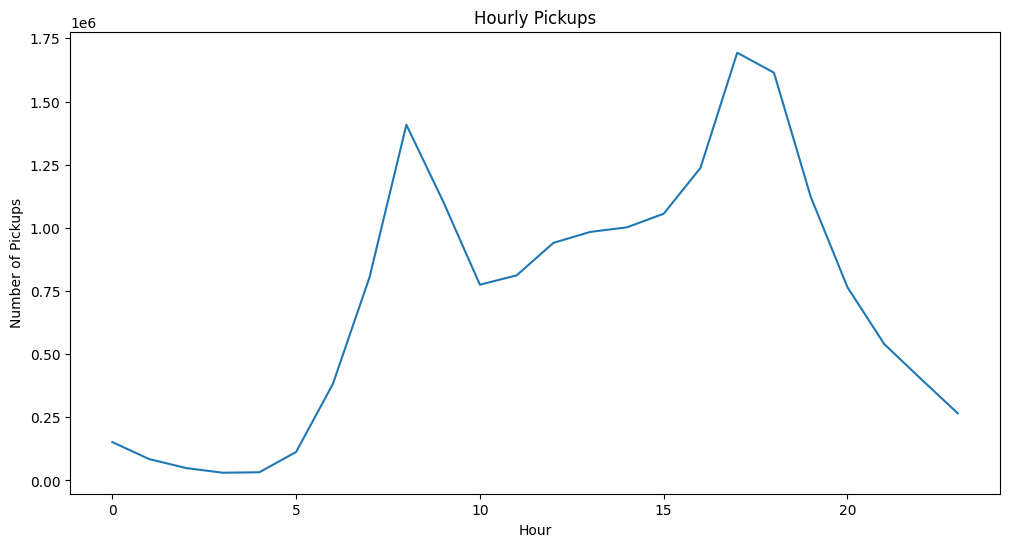

In [12]:
daily_trips = data.groupby(data['starttime'].dt.hour).size()
daily_trips.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Pickups')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.show()

# 2. Prediction Challenge

In this section, we address key tasks crucial for predicting bike demand and thus optimizing bike-sharing operations:

We start with Spatial Clustering, where we group nearby departing stations together, forming clusters that reflect the stations' geographical distribution.

Next, we focus on Demand Prediction, aiming to build a predictive model. This model forecasts demand for a cluster of stations over the next 24 hours, covering both arrivals and departures. We train this model on historical data from January to October, reserving data from November and December for testing. Our target is to achieve an R-squared (R2) value of at least 0.60, demonstrating the model's accuracy in predicting demand patterns.

Finally, we look into Bike Repositioning, utilizing predictions from the demand model. We calculate the required number of bicycles to be relocated for the cluster of stations analyzed, ensuring that there are no bike shortages during the next day, or minimizing them if they occur.

These tasks collectively contribute to enhancing operational efficiency and service quality for the bike-sharing company.

## 2.1 Clustering 

First of all, we have to split the stations into clusters as the prediction model will be based on one of these clusters. The clustering algorithm that will be used is k-means and thus 20 unique clusters will be created. 

In [13]:
from sklearn.cluster import KMeans

coords = data[['start_station_latitude', 'start_station_longitude']].drop_duplicates()

kmeans = KMeans(n_clusters=20, random_state=42)
coords['cluster'] = kmeans.fit_predict(coords)

In [14]:
coords.head()

,start_station_latitude,start_station_longitude,cluster
0,40.767272,-73.993929,8
1324,40.719116,-74.006667,10
2430,40.711174,-74.000165,10
2866,40.683826,-73.976323,14
3551,40.696089,-73.978034,14


Now the stations are plotted. The current plot in not very useful, due to the fact that there is some noise (outliers) at the top right corner (as can be seen in the plot "Stations without Clustering"). 

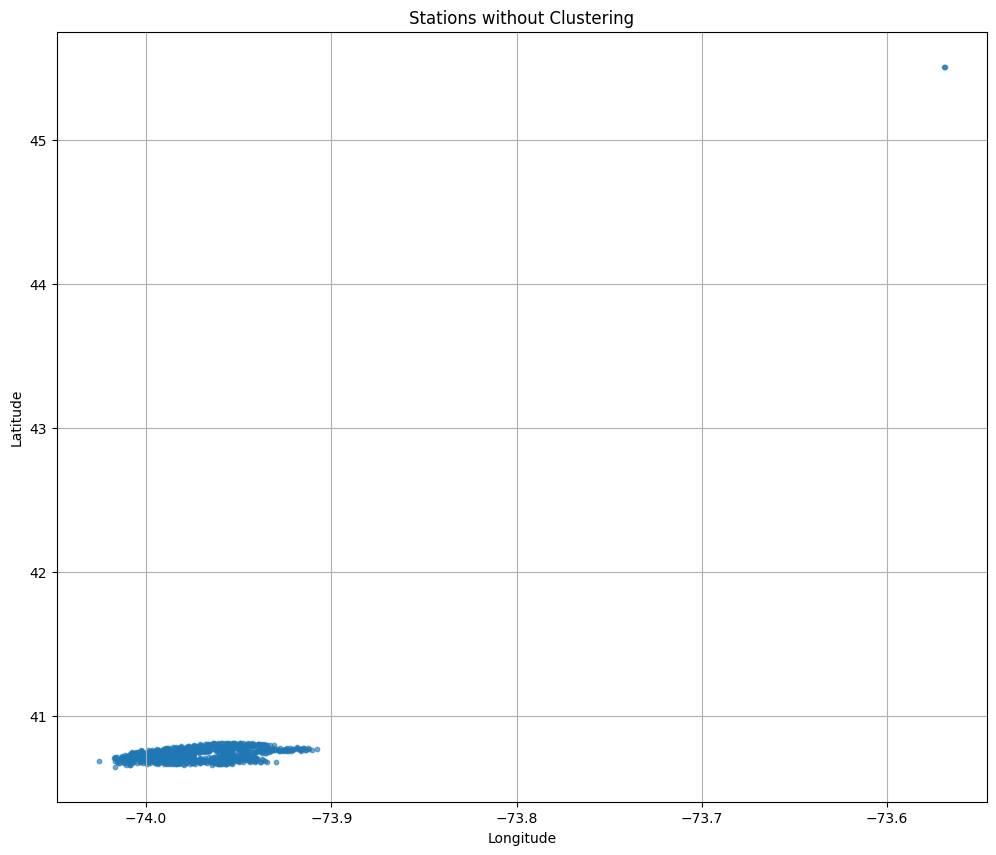

In [15]:
plt.figure(figsize=(12, 10))
plt.scatter(coords['start_station_longitude'], coords['start_station_latitude'], s=10, alpha=0.6)
plt.title('Stations without Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

So now, the data has to be filtered and the outliers have to be removed. For this we are going to use the mean of the latitude and the longitude of the stations. A threshold is set, so that if the difference between a station's coordinates and the mean is bigger than this threshold, the station is considered an outlier and is removed. After this process 70 stations were removed.

In [16]:
mean_latitude = coords['start_station_latitude'].mean()
mean_longitude = coords['start_station_longitude'].mean()

threshold = 2

filtered_data = data[~((abs(data['start_station_latitude'] - mean_latitude) > threshold) | 
                       (abs(data['start_station_longitude'] - mean_longitude) > threshold))]

print(filtered_data.shape)
print(data.shape)

(17370369, 13)
(17370439, 13)


The filtered data which is without outliers has been created and we now vizualize the filtered data with clusters.

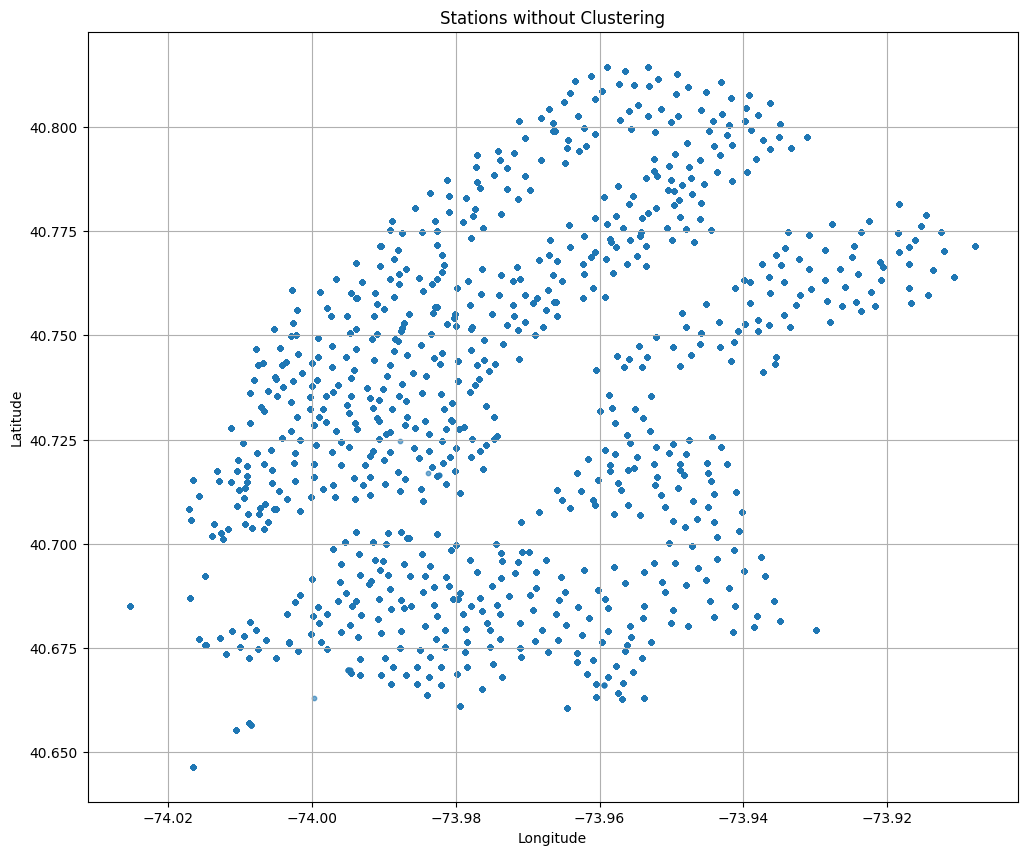

In [17]:
plt.figure(figsize=(12, 10))
plt.scatter(filtered_data['start_station_longitude'], filtered_data['start_station_latitude'], s=10, alpha=0.6)
plt.title('Stations without Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

To make sure all remaining datapoints are valid station datapoints we can overlay the plot of the stations with a map of New York using the coordinates form the dataset.  
As we see it looks like all station locations are valid. 


In [18]:
import folium

coords = filtered_data[['start_station_latitude', 'start_station_longitude']].drop_duplicates()

center_lat = coords['start_station_latitude'].mean()
center_lon = coords['start_station_longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='OpenStreetMap')

for idx, row in coords.iterrows():
    folium.CircleMarker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        radius=3,
        popup=f"Station: {row['start_station_latitude']:.4f}, {row['start_station_longitude']:.4f}",
        color='red',
        fill=True,
        fillColor='red',
        fillOpacity=0.6,
        weight=1
    ).add_to(m)

m

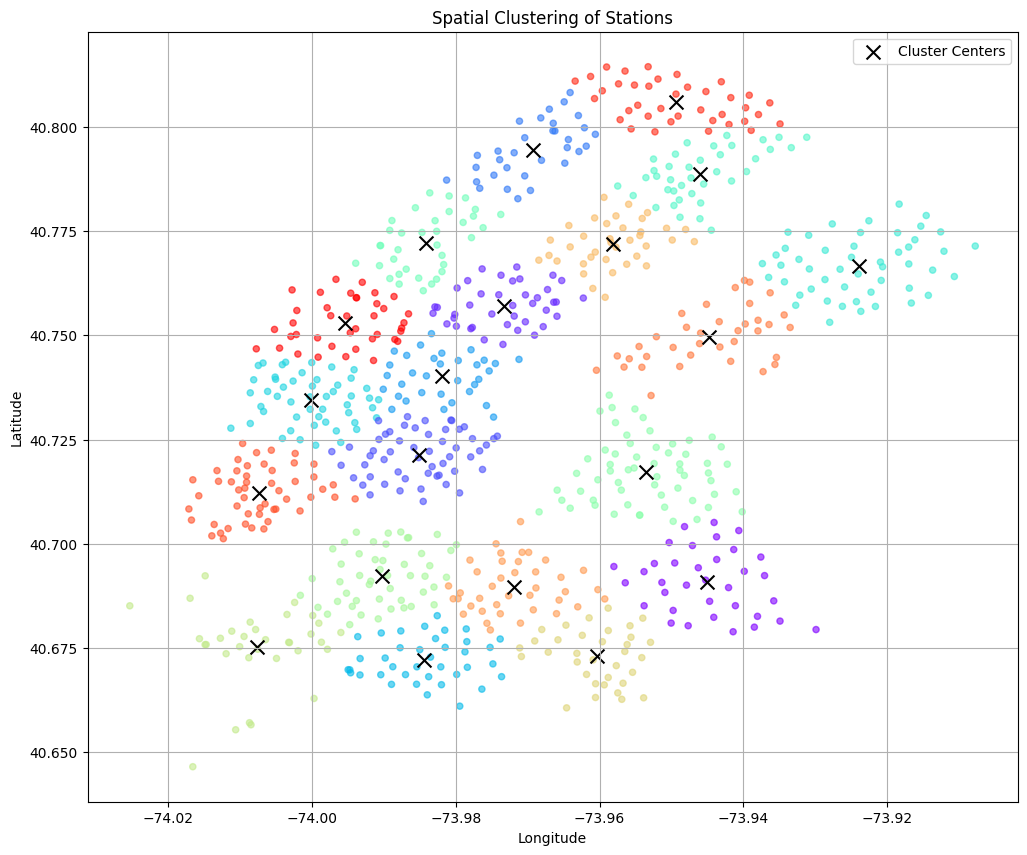

In [19]:
coords = filtered_data[['start_station_latitude', 'start_station_longitude']].drop_duplicates()

coords['cluster'] = kmeans.fit_predict(coords)

plt.figure(figsize=(12, 10))
plt.scatter(coords['start_station_longitude'], coords['start_station_latitude'], c=coords['cluster'], cmap='rainbow', s=20, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='black', marker="x", label='Cluster Centers')
plt.title('Spatial Clustering of Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

Last but not least, the column *'cluster'* from *coords* set is inserted to the original data set and then we will decide the cluster on which the prediction model will be build. 

In [20]:
filtered_data = pd.merge(filtered_data, coords[['start_station_longitude' , 'start_station_latitude' , 'cluster']])

In [21]:
filtered_data.sample(10)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
16887018,313,2018-12-14 07:26:57.734,2018-12-14 07:32:11.310,236.0,40.728419,-73.987140,401.0,40.720196,-73.989978,30871,Subscriber,1994,2,2
6855312,1962,2018-06-29 17:00:00.593,2018-06-29 17:32:43.354,3092.0,40.719009,-73.958525,3580.0,40.673724,-73.963161,25487,Subscriber,1973,2,10
17158082,991,2018-12-21 23:21:57.917,2018-12-21 23:38:29.879,3263.0,40.729515,-73.990753,223.0,40.737815,-73.999947,35691,Subscriber,1965,1,2
9716646,1260,2018-08-05 16:05:49.046,2018-08-05 16:26:49.300,406.0,40.695128,-73.995951,3676.0,40.675833,-74.014726,20108,Subscriber,1975,1,11
12273312,1044,2018-09-15 20:32:38.026,2018-09-15 20:50:02.375,3255.0,40.750585,-73.994685,3375.0,40.769943,-73.960607,21378,Subscriber,1969,1,19
1057917,177,2018-02-19 15:15:24.601,2018-02-19 15:18:21.621,462.0,40.746920,-74.004519,453.0,40.744751,-73.999154,33404,Subscriber,1983,2,19
2079156,361,2018-03-16 08:18:57.901,2018-03-16 08:24:59.141,515.0,40.760094,-73.994618,514.0,40.760875,-74.002777,17237,Subscriber,1946,2,19
13488917,980,2018-10-04 10:30:08.299,2018-10-04 10:46:29.255,418.0,40.702240,-73.982578,296.0,40.714131,-73.997047,20617,Subscriber,1958,1,11
16844360,360,2018-12-13 06:03:06.776,2018-12-13 06:09:07.658,528.0,40.742909,-73.977061,486.0,40.746201,-73.988557,30845,Subscriber,1966,1,4
14822297,407,2018-10-26 09:59:15.464,2018-10-26 10:06:03.417,3147.0,40.778012,-73.954071,3156.0,40.766638,-73.953483,34203,Subscriber,1977,1,14


The last step of this part is the selection of the cluster for which the prediction model will be formulated. The cluster that was selected was the one with the higher demand. As can be seen below, the cluster with the most trips is #9 and so we will proceed with the data that comes only from the stations of this cluster.

In [22]:
filtered_data['cluster'].value_counts().sort_values(ascending=False)

cluster
6     2280677
19    1989096
2     1745910
4     1606012
17    1543075
1     1426880
9     1228227
10     887354
11     784320
14     661768
3      574307
15     492518
5      377851
8      346383
18     323291
13     255620
7      244343
16     220977
0      216180
12     165580
Name: count, dtype: int64

In [23]:
filtered_data = filtered_data[filtered_data['cluster'] == 9]

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228227 entries, 0 to 17370362
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   tripduration             1228227 non-null  int64         
 1   starttime                1228227 non-null  datetime64[ns]
 2   stoptime                 1228227 non-null  datetime64[ns]
 3   start_station_id         1228227 non-null  float64       
 4   start_station_latitude   1228227 non-null  float64       
 5   start_station_longitude  1228227 non-null  float64       
 6   end_station_id           1228227 non-null  float64       
 7   end_station_latitude     1228227 non-null  float64       
 8   end_station_longitude    1228227 non-null  float64       
 9   bikeid                   1228227 non-null  int64         
 10  usertype                 1228227 non-null  object        
 11  birth_year               1228227 non-null  int64         
 12  gend

## 2.2 Prediction model

For predicting on the data set we want to look at three different models; K-NN, Linear Regression and Multi-Layer Perceptron. 

First we must prepare our data to be usable with the selected models, we generate our initial training features by computing the number of pickups and dropoffs in 1 hour intervals.

In [24]:
hourly_pickups = filtered_data.groupby([filtered_data['starttime'].dt.floor('H')]).size().reset_index(name='pickups')
hourly_pickups['starttime'] = hourly_pickups['starttime'].dt.strftime('%Y-%m-%d %H:%M')

print(hourly_pickups.head())

hourly_dropoffs = filtered_data.groupby([filtered_data['stoptime'].dt.floor('H')]).size().reset_index(name='dropoffs')
hourly_dropoffs['stoptime'] = hourly_dropoffs['stoptime'].dt.strftime('%Y-%m-%d %H:%M')

print(hourly_dropoffs.head())

          starttime  pickups
0  2018-01-01 00:00        7
1  2018-01-01 01:00       10
2  2018-01-01 02:00        7
3  2018-01-01 03:00        4
4  2018-01-01 04:00        2
           stoptime  dropoffs
0  2018-01-01 00:00         5
1  2018-01-01 01:00        12
2  2018-01-01 02:00         6
3  2018-01-01 03:00         4
4  2018-01-01 04:00         3


We then split the data set into training and testing sets, with the training set consisting of the first 10 months of the year and the testing set consisting of the last 2.

In [25]:
hourly_pickups['starttime'] = pd.to_datetime(hourly_pickups['starttime'])
hourly_dropoffs['stoptime'] = pd.to_datetime(hourly_dropoffs['stoptime'])

train_data_pickups = hourly_pickups[hourly_pickups['starttime'].dt.month <= 10]
train_data_dropoffs = hourly_dropoffs[hourly_dropoffs['stoptime'].dt.month <= 10]

test_data_pickups = hourly_pickups[hourly_pickups['starttime'].dt.month > 10]
test_data_dropoffs = hourly_dropoffs[hourly_dropoffs['stoptime'].dt.month > 10]

Now we add lag features to our training sets, and store further binary features for our models:  
Is this interval during a weekend, is this the peak demand interval

In [26]:
for i in range(1, 4): 
    train_data_pickups[f'lag_{i}'] = train_data_pickups['pickups'].shift(i)
      
for i in range(1, 4):  
    train_data_dropoffs[f'lag_{i}'] = train_data_dropoffs['dropoffs'].shift(i)
        
train_data_pickups['hour'] = train_data_pickups['starttime'].dt.hour
train_data_pickups['day_of_week'] = train_data_pickups['starttime'].dt.dayofweek
train_data_pickups['month'] = train_data_pickups['starttime'].dt.month
train_data_pickups['is_weekend'] = train_data_pickups['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
train_data_pickups['peak_demand'] = train_data_pickups['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

train_data_dropoffs['hour'] = train_data_dropoffs['stoptime'].dt.hour
train_data_dropoffs['day_of_week'] = train_data_dropoffs['stoptime'].dt.dayofweek
train_data_dropoffs['month'] = train_data_dropoffs['stoptime'].dt.month
train_data_dropoffs['is_weekend'] = train_data_dropoffs['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
train_data_dropoffs['peak_demand'] = train_data_dropoffs['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

train_data_pickups = train_data_pickups.dropna()
train_data_dropoffs = train_data_dropoffs.dropna()

X_train_pickups = train_data_pickups.drop(['pickups', 'starttime', 'day_of_week', 'hour', 'month'], axis=1)
y_train_pickups = train_data_pickups['pickups']

X_train_dropoffs = train_data_dropoffs.drop(['dropoffs', 'stoptime', 'day_of_week', 'hour', 'month'], axis=1)
y_train_dropoffs = train_data_dropoffs['dropoffs']

for i in range(1, 4):
    test_data_pickups[f'lag_{i}'] = test_data_pickups['pickups'].shift(i)  

for i in range(1, 4):
    test_data_dropoffs[f'lag_{i}'] = test_data_dropoffs['dropoffs'].shift(i)
      
test_data_pickups['hour'] = test_data_pickups['starttime'].dt.hour
test_data_pickups['day_of_week'] = test_data_pickups['starttime'].dt.dayofweek
test_data_pickups['month'] = test_data_pickups['starttime'].dt.month
test_data_pickups['is_weekend'] = test_data_pickups['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test_data_pickups['peak_demand'] = test_data_pickups['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

test_data_dropoffs['hour'] = test_data_dropoffs['stoptime'].dt.hour
test_data_dropoffs['day_of_week'] = test_data_dropoffs['stoptime'].dt.dayofweek
test_data_dropoffs['month'] = test_data_dropoffs['stoptime'].dt.month
test_data_dropoffs['is_weekend'] = test_data_dropoffs['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test_data_dropoffs['peak_demand'] = test_data_dropoffs['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

test_data_pickups = test_data_pickups.dropna()
test_data_dropoffs = test_data_dropoffs.dropna()

X_test_pickups = test_data_pickups.drop(['pickups', 'starttime', 'day_of_week', 'hour', 'month'], axis=1)
y_test_pickups = test_data_pickups['pickups']

X_test_dropoffs = test_data_dropoffs.drop(['dropoffs', 'stoptime', 'day_of_week', 'hour', 'month'], axis=1)
y_test_dropoffs = test_data_dropoffs['dropoffs']

In [27]:
X_train_pickups.head()

,lag_1,lag_2,lag_3,is_weekend,peak_demand
3,7.0,10.0,7.0,0,0
4,4.0,7.0,10.0,0,0
5,2.0,4.0,7.0,0,0
6,1.0,2.0,4.0,0,0
7,3.0,1.0,2.0,0,1


In [28]:
X_test_pickups.head()

,lag_1,lag_2,lag_3,is_weekend,peak_demand
7220,4.0,8.0,22.0,0,0
7221,4.0,4.0,8.0,0,0
7222,5.0,4.0,4.0,0,0
7223,31.0,5.0,4.0,0,0
7224,123.0,31.0,5.0,0,1


For our first prediction model we have a KNN model, using K = 15

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=15)

model.fit(X_train_pickups, y_train_pickups)

y_pred_pickups = model.predict(X_test_pickups)

rmse = root_mean_squared_error(y_test_pickups, y_pred_pickups)
print(f"Root Mean Squared Error: {rmse}")

r2_pickups = r2_score(y_test_pickups, y_pred_pickups)
print(f"R^2: {r2_pickups}")

Root Mean Squared Error: 34.254737330827666
R^2: 0.8835631407081928


In [30]:
model.fit(X_train_dropoffs, y_train_dropoffs)

y_pred_dropoffs = model.predict(X_test_dropoffs)

rmse = root_mean_squared_error(y_test_dropoffs, y_pred_dropoffs)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_dropoffs, y_pred_dropoffs)
print(f"R^2: {r2}")

Root Mean Squared Error: 31.634681411644664
R^2: 0.8985334388482504


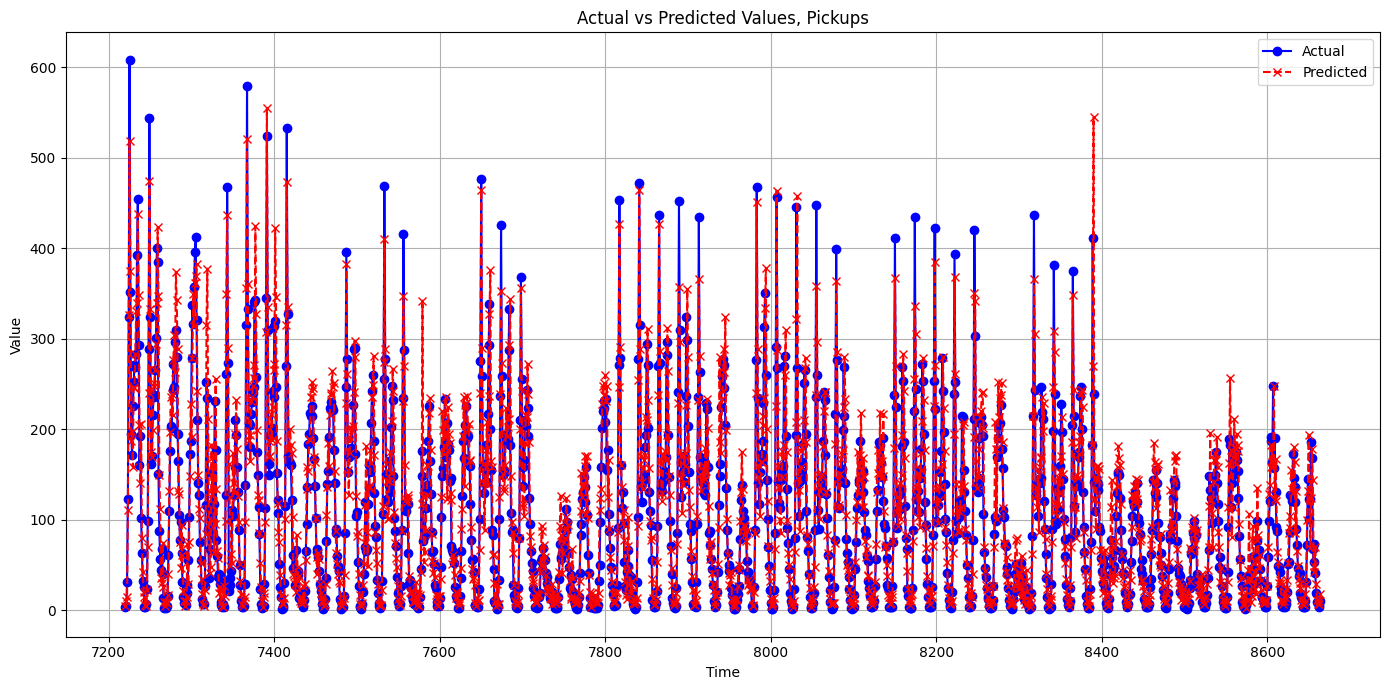

In [31]:
plt.figure(figsize=(14,7))
plt.plot(y_test_pickups.index, y_test_pickups.values, label='Actual', color='blue', marker='o')
plt.plot(y_test_pickups.index, y_pred_pickups, label='Predicted', color='red', linestyle='dashed', marker='x')
plt.title('Actual vs Predicted Values, Pickups')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

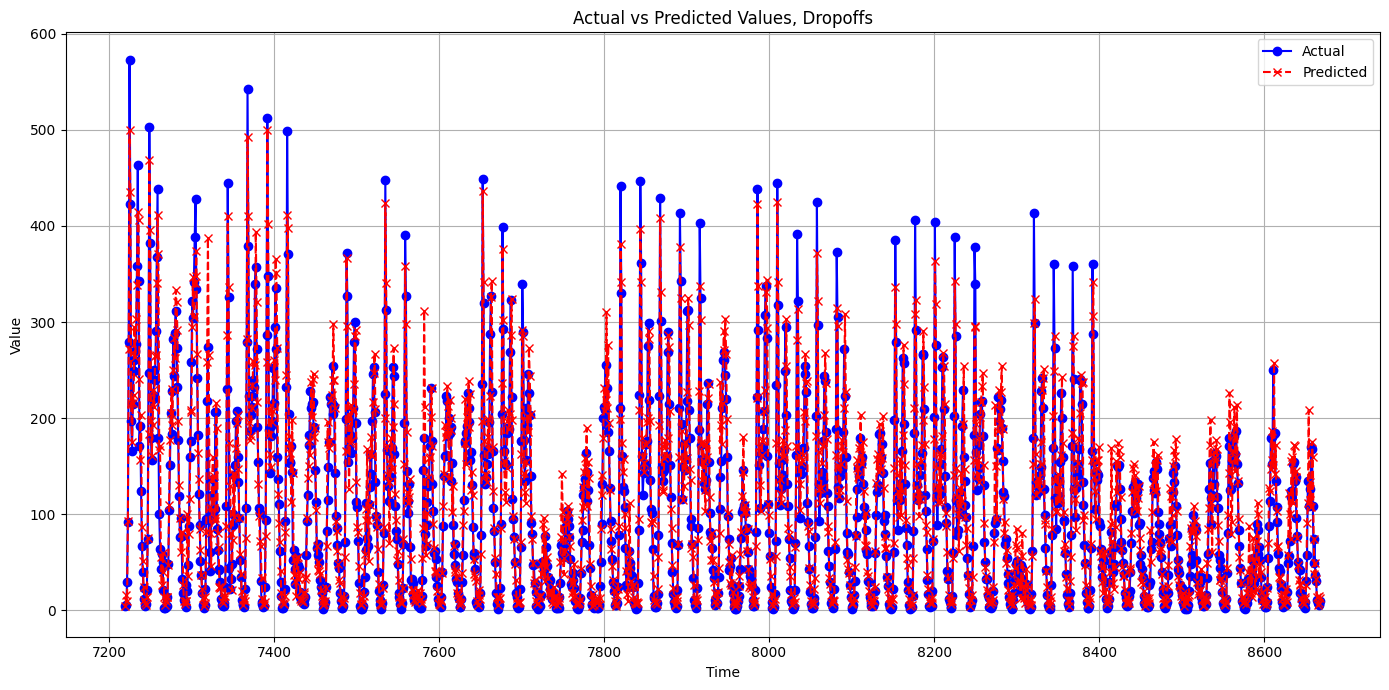

In [32]:
plt.figure(figsize=(14,7))
plt.plot(y_test_dropoffs.index, y_test_dropoffs.values, label='Actual', color='blue', marker='o')
plt.plot(y_test_dropoffs.index, y_pred_dropoffs, label='Predicted', color='red', linestyle='dashed', marker='x')
plt.title('Actual vs Predicted Values, Dropoffs')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A linear regression model for the same problem

In [33]:
model1 = LinearRegression()

model1.fit(X_train_pickups, y_train_pickups)

y_pred = model1.predict(X_test_pickups)

rmse = root_mean_squared_error(y_test_pickups, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_pickups, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 51.838589291288805
R^2: 0.7333414287126331


In [34]:
model1 = LinearRegression()

model1.fit(X_train_dropoffs, y_train_dropoffs)

y_pred = model1.predict(X_test_dropoffs)

rmse = root_mean_squared_error(y_test_dropoffs, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_dropoffs, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 47.82291668443706
R^2: 0.768117415991171


a Multi-layer Perceptron for the same problem

In [35]:
from sklearn.neural_network import MLPRegressor
model2 = MLPRegressor()
model2.fit(X_train_pickups, y_train_pickups)
y_pred = model2.predict(X_test_pickups)

rmse = root_mean_squared_error(y_test_pickups, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_pickups, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 32.13230263017248
R^2: 0.8975450616328483


In [36]:
model3 = MLPRegressor()
model3.fit(X_train_dropoffs, y_train_dropoffs)
y_pred = model3.predict(X_test_dropoffs)

rmse = root_mean_squared_error(y_test_dropoffs, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_dropoffs, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 30.411200472868853
R^2: 0.9062301675919464


As can be seen from the results the K-NN and MLP models perform quite well, with an R^2 of 0.8836 and 0.8975 for pickups and 0.8985 and 0.9062 for dropoffs respectively, with the Linear Regression model lagging quite far behind with an R^2 of 0.7333 for pickups and 0.7681 for dropoffs. Thus for the following segments we will continue working with the prior two and dropping the Linear Regression model.

## 2.3 Repositioning of bikes

To calculate the number of bikes required within the cluster for any given day we look at the cumulative hourly number of bikes within the cluster, with the assumption of starting the day with 0 bikes in the cluster. To do this we compare the difference in number of dropoffs and pickups from our prediction model for any given hour, storing the running number of bikes within the cluster at each interval. 

Once we have this cumulative number for each hour within each day we look at the lowest value for each day. If the lowest value is negative we know we have to reposition the absolute value of said lowest value to the cluster, if however the value is positive we can safely remove at most the lowest value bikes from the cluster during repositioning.

In [37]:
sum = np.zeros((60,24)) 
cumsum = np.zeros((60,24)) 
runsum = 0 
for i in range(y_pred_pickups.shape[0]//24): 
    for j in range(24):
        if j == 0: runsum = 0 
        x = y_pred_dropoffs[i*24 + j]
        y = y_pred_pickups[i*24 + j]
        sum[i,j] = x-y 
        runsum += sum[i,j] 
        cumsum[i,j] = runsum
for i in range(60):
    print(np.min(cumsum[i])) 

-90.40000000000006
-89.80000000000001
-201.13333333333338
-45.5333333333334
-437.7333333333333
-496.33333333333337
-608.0666666666666
-628.6
-555.1333333333333
-387.73333333333323
-321.6
-422.26666666666665
-510.6
-663.6
-527.6666666666666
-71.19999999999999
-348.0000000000001
-827.8666666666666
35.80000000000001
6.1333333333332405
16.266666666666737
-126.13333333333331
-42.33333333333327
-212.33333333333331
-662.0666666666666
-45.133333333333155
58.33333333333337
12.866666666666674
11.199999999999989
185.66666666666654
-334.8666666666666
-801.4000000000002
-566.6666666666667
-528.0666666666666
-521.2000000000002
-336.8666666666668
-343.93333333333334
-81.73333333333335
-512.7333333333332
-639.3333333333333
-534.2666666666667
-337.6000000000002
-538.2666666666667
-281.46666666666664
-257.4666666666667
-690.2666666666667
-362.7333333333334
-417.0666666666666
-558.8666666666666
-57.000000000000014
-144.20000000000002
-137.86666666666653
-72.66666666666674
109.46666666666667
-281.2
-119.6

Optimally we would have these values for every cluster, or even every station which would result in optimal redistribution of bikes within the city. This could also of course be augmented with some operation research to perhaps minimize distance traveled during redistribution of the bikes.

One might also want to look at redistributing the bikes on a smaller time interval, such as hourly, to prevent an excess of bikes within a cluster or station at any time. This however might not be a realistic solution as the cost of redistribution might prove to be too high to justify.

# 3. Exploratory component

We want to explore whether augmenting our data set with weather data will lead to a more accurate prediction model. The data is grabbed from https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2018-11

Given that we only have weather data on a daily basis we want to merge the weather data to our bike dataset by looking at the day of year for both datasets for merging.

In [38]:
weather = pd.read_csv("weather_data.csv", sep=';')
weather = weather.astype('float')
weather['day_of_year'] = weather.index+1
filtered_data['day_of_year'] = filtered_data['starttime'].dt.dayofyear
explore = filtered_data.merge(weather, left_on='day_of_year', right_on='day_of_year').reset_index()

In [39]:
weather.head()

,Day,Temperature max,Temperature avg,Temperature min,Dew point max,Dew point avg,Dew point min,Humidity max,Humidity avg,Humidity min,Wind speed max,Wind speed avg,Wind Speed min,Pressure Max,Pressure avg,Pressure min,Precipation,day_of_year
0,1.0,19.0,14.0,8.0,3.0,-0.7,-3.0,67.0,53.1,38.0,22.0,17.0,12.0,30.4,30.3,30.3,0.00,1
1,2.0,26.0,19.4,14.0,7.0,3.8,1.0,59.0,51.1,41.0,21.0,13.9,8.0,30.4,30.3,30.3,0.00,2
2,3.0,30.0,24.2,18.0,13.0,3.4,0.0,53.0,41.3,29.0,16.0,6.9,0.0,30.3,30.2,30.0,0.00,3
3,4.0,29.0,25.0,20.0,22.0,16.4,6.0,92.0,72.4,39.0,37.0,25.4,8.0,29.9,29.5,29.2,0.02,4
4,5.0,19.0,14.2,11.0,5.0,-2.8,-7.0,56.0,47.3,37.0,31.0,24.8,18.0,30.0,29.8,29.5,6.54,5


Here we have decided to augment our data with the average temperature for the day, the precipation for the day, the dew point average for the day, the average humidity for the day as well as average windspeed for the day.

In [40]:
hourly_pickups = explore.groupby([explore['starttime'].dt.floor('H'),'Temperature avg', 'Precipation', 'Dew point avg', 'Humidity avg', 'Wind speed avg']).size().reset_index(name='pickups')
hourly_pickups['starttime'] = hourly_pickups['starttime'].dt.strftime('%Y-%m-%d %H:%M')

print(hourly_pickups.head())

hourly_dropoffs = explore.groupby([explore['stoptime'].dt.floor('H'),'Temperature avg', 'Precipation', 'Dew point avg', 'Humidity avg', 'Wind speed avg']).size().reset_index(name='dropoffs')
hourly_dropoffs['stoptime'] = hourly_dropoffs['stoptime'].dt.strftime('%Y-%m-%d %H:%M')

print(hourly_dropoffs.head())

          starttime  Temperature avg  Precipation  Dew point avg  \
0  2018-01-01 00:00             14.0          0.0           -0.7   
1  2018-01-01 01:00             14.0          0.0           -0.7   
2  2018-01-01 02:00             14.0          0.0           -0.7   
3  2018-01-01 03:00             14.0          0.0           -0.7   
4  2018-01-01 04:00             14.0          0.0           -0.7   

   Humidity avg  Wind speed avg  pickups  
0          53.1            17.0        7  
1          53.1            17.0       10  
2          53.1            17.0        7  
3          53.1            17.0        4  
4          53.1            17.0        2  
           stoptime  Temperature avg  Precipation  Dew point avg  \
0  2018-01-01 00:00             14.0          0.0           -0.7   
1  2018-01-01 01:00             14.0          0.0           -0.7   
2  2018-01-01 02:00             14.0          0.0           -0.7   
3  2018-01-01 03:00             14.0          0.0           -

Do the same protocols as in the prediction chapter to prepare training and testing sets.

In [41]:
hourly_pickups['starttime'] = pd.to_datetime(hourly_pickups['starttime'])
hourly_dropoffs['stoptime'] = pd.to_datetime(hourly_dropoffs['stoptime'])

train_data_pickups = hourly_pickups[hourly_pickups['starttime'].dt.month <= 10]
train_data_dropoffs = hourly_dropoffs[hourly_dropoffs['stoptime'].dt.month <= 10]

test_data_pickups = hourly_pickups[hourly_pickups['starttime'].dt.month > 10]
test_data_dropoffs = hourly_dropoffs[hourly_dropoffs['stoptime'].dt.month > 10]

In [42]:
for i in range(1, 4):  
    train_data_pickups[f'lag_{i}'] = train_data_pickups['pickups'].shift(i)
    
for i in range(1, 4):  
    train_data_dropoffs[f'lag_{i}'] = train_data_dropoffs['dropoffs'].shift(i)
    
train_data_pickups['hour'] = train_data_pickups['starttime'].dt.hour
train_data_pickups['day_of_week'] = train_data_pickups['starttime'].dt.dayofweek
train_data_pickups['month'] = train_data_pickups['starttime'].dt.month
train_data_pickups['is_weekend'] = train_data_pickups['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
train_data_pickups['peak_demand'] = train_data_pickups['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

train_data_dropoffs['hour'] = train_data_dropoffs['stoptime'].dt.hour
train_data_dropoffs['day_of_week'] = train_data_dropoffs['stoptime'].dt.dayofweek
train_data_dropoffs['month'] = train_data_dropoffs['stoptime'].dt.month
train_data_dropoffs['is_weekend'] = train_data_dropoffs['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
train_data_dropoffs['peak_demand'] = train_data_dropoffs['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

train_data_pickups = train_data_pickups.dropna()
train_data_dropoffs = train_data_dropoffs.dropna()

X_train_pickups = train_data_pickups.drop(['pickups', 'starttime', 'day_of_week', 'hour', 'month'], axis=1)
y_train_pickups = train_data_pickups['pickups']

X_train_dropoffs = train_data_dropoffs.drop(['dropoffs', 'stoptime', 'day_of_week', 'hour', 'month'], axis=1)
y_train_dropoffs = train_data_dropoffs['dropoffs']

for i in range(1, 4):
    test_data_pickups[f'lag_{i}'] = test_data_pickups['pickups'].shift(i)
    
for i in range(1, 4):
    test_data_dropoffs[f'lag_{i}'] = test_data_dropoffs['dropoffs'].shift(i)
     
test_data_pickups['hour'] = test_data_pickups['starttime'].dt.hour
test_data_pickups['day_of_week'] = test_data_pickups['starttime'].dt.dayofweek
test_data_pickups['month'] = test_data_pickups['starttime'].dt.month
test_data_pickups['is_weekend'] = test_data_pickups['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test_data_pickups['peak_demand'] = test_data_pickups['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

test_data_dropoffs['hour'] = test_data_dropoffs['stoptime'].dt.hour
test_data_dropoffs['day_of_week'] = test_data_dropoffs['stoptime'].dt.dayofweek
test_data_dropoffs['month'] = test_data_dropoffs['stoptime'].dt.month
test_data_dropoffs['is_weekend'] = test_data_dropoffs['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test_data_dropoffs['peak_demand'] = test_data_dropoffs['hour'].apply(lambda x: 1 if x >= 7 and x<=9 or x>=16 and x<=19 else 0)

test_data_pickups = test_data_pickups.dropna()
test_data_dropoffs = test_data_dropoffs.dropna()

X_test_pickups = test_data_pickups.drop(['pickups', 'starttime', 'day_of_week', 'hour', 'month'], axis=1)
y_test_pickups = test_data_pickups['pickups']

X_test_dropoffs = test_data_dropoffs.drop(['dropoffs', 'stoptime', 'day_of_week', 'hour', 'month'], axis=1)
y_test_dropoffs = test_data_dropoffs['dropoffs']

Create models identical to the prediction chapter for model comparison with augmented data. Excluding Linear Regression.

In [43]:
model = KNeighborsRegressor(n_neighbors=15)

model.fit(X_train_pickups, y_train_pickups)

y_pred_pickups = model.predict(X_test_pickups)

rmse = root_mean_squared_error(y_test_pickups, y_pred_pickups)
print(f"Root Mean Squared Error: {rmse}")

r2_pickups = r2_score(y_test_pickups, y_pred_pickups)
print(f"R^2: {r2_pickups}")

Root Mean Squared Error: 31.736887697969948
R^2: 0.9000511343906


In [44]:
model.fit(X_train_dropoffs, y_train_dropoffs)

y_pred_dropoffs = model.predict(X_test_dropoffs)

rmse = root_mean_squared_error(y_test_dropoffs, y_pred_dropoffs)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_dropoffs, y_pred_dropoffs)
print(f"R^2: {r2}")

Root Mean Squared Error: 29.502751076569556
R^2: 0.9119234351089557


In [45]:
model2 = MLPRegressor()
model2.fit(X_train_pickups, y_train_pickups)
y_pred = model2.predict(X_test_pickups)

rmse = root_mean_squared_error(y_test_pickups, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_pickups, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 30.51464486413521
R^2: 0.9076013046724155


In [46]:
model2 = MLPRegressor()
model2.fit(X_train_dropoffs, y_train_dropoffs)
y_pred = model2.predict(X_test_dropoffs)

rmse = root_mean_squared_error(y_test_dropoffs, y_pred)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_dropoffs, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error: 28.997211654769362
R^2: 0.9149160163894404


As we can see compared to our previous KNN and MLP models in the prediction model portion, we do see some improvement in R squared with the addition of weather data. Something that could potentially increase performance of our prediction model further would be more in depth weather data, be it more weather features or having an hourly weather forecast before redistributing the bikes.

**Model performance(Pickups/Dropoffs)**  
<u>Without weather data</u>    
KNN: 0.8836/0.8985  
MLP: 0.8975/0.9062    
<u>With weather data</u>  
KNN: 0.9001/0.9119  
MLP: 0.9076/0.9149

# 4. Conclusions

We wanted to investigate whether it would be possible to use data science techniques to predict the demand for City Bikes. We did this with a data set from Citi Bike.  
 By performing the proper data cleaning and preprocessing we could succesfuly predict the bike demand within a cluster with acceptable accuracy through the use of K-NN and MLP prediction models.  
To further investigate possible enhancements to the prediction models to improve accuracy we augmented our data with weather data for the period of our data set. Here we found that including features from weather data such as temperature and precipation we could only marginally affect the model performance, however it is entirely possible that with more detailed weather data we could see a much greater effect on model performance. 

If we were to exlore and optimize further it could be beneficial to include national holidays and on a smaller scale even sports and other large venue events. It might also be interesting to take a look at possible closing of roads due to construction to see whether it has a great effect on demand for affected clusters of stations.  
We might also see increased performance by accessing multiple years of data for training, such that we could train for every month of the year to perhaps increase prediction accuracy for the months of november and december. There is of course also possible room for improvement with significantly more complex models for prediction, such as significantly deeper and wider neural networks.